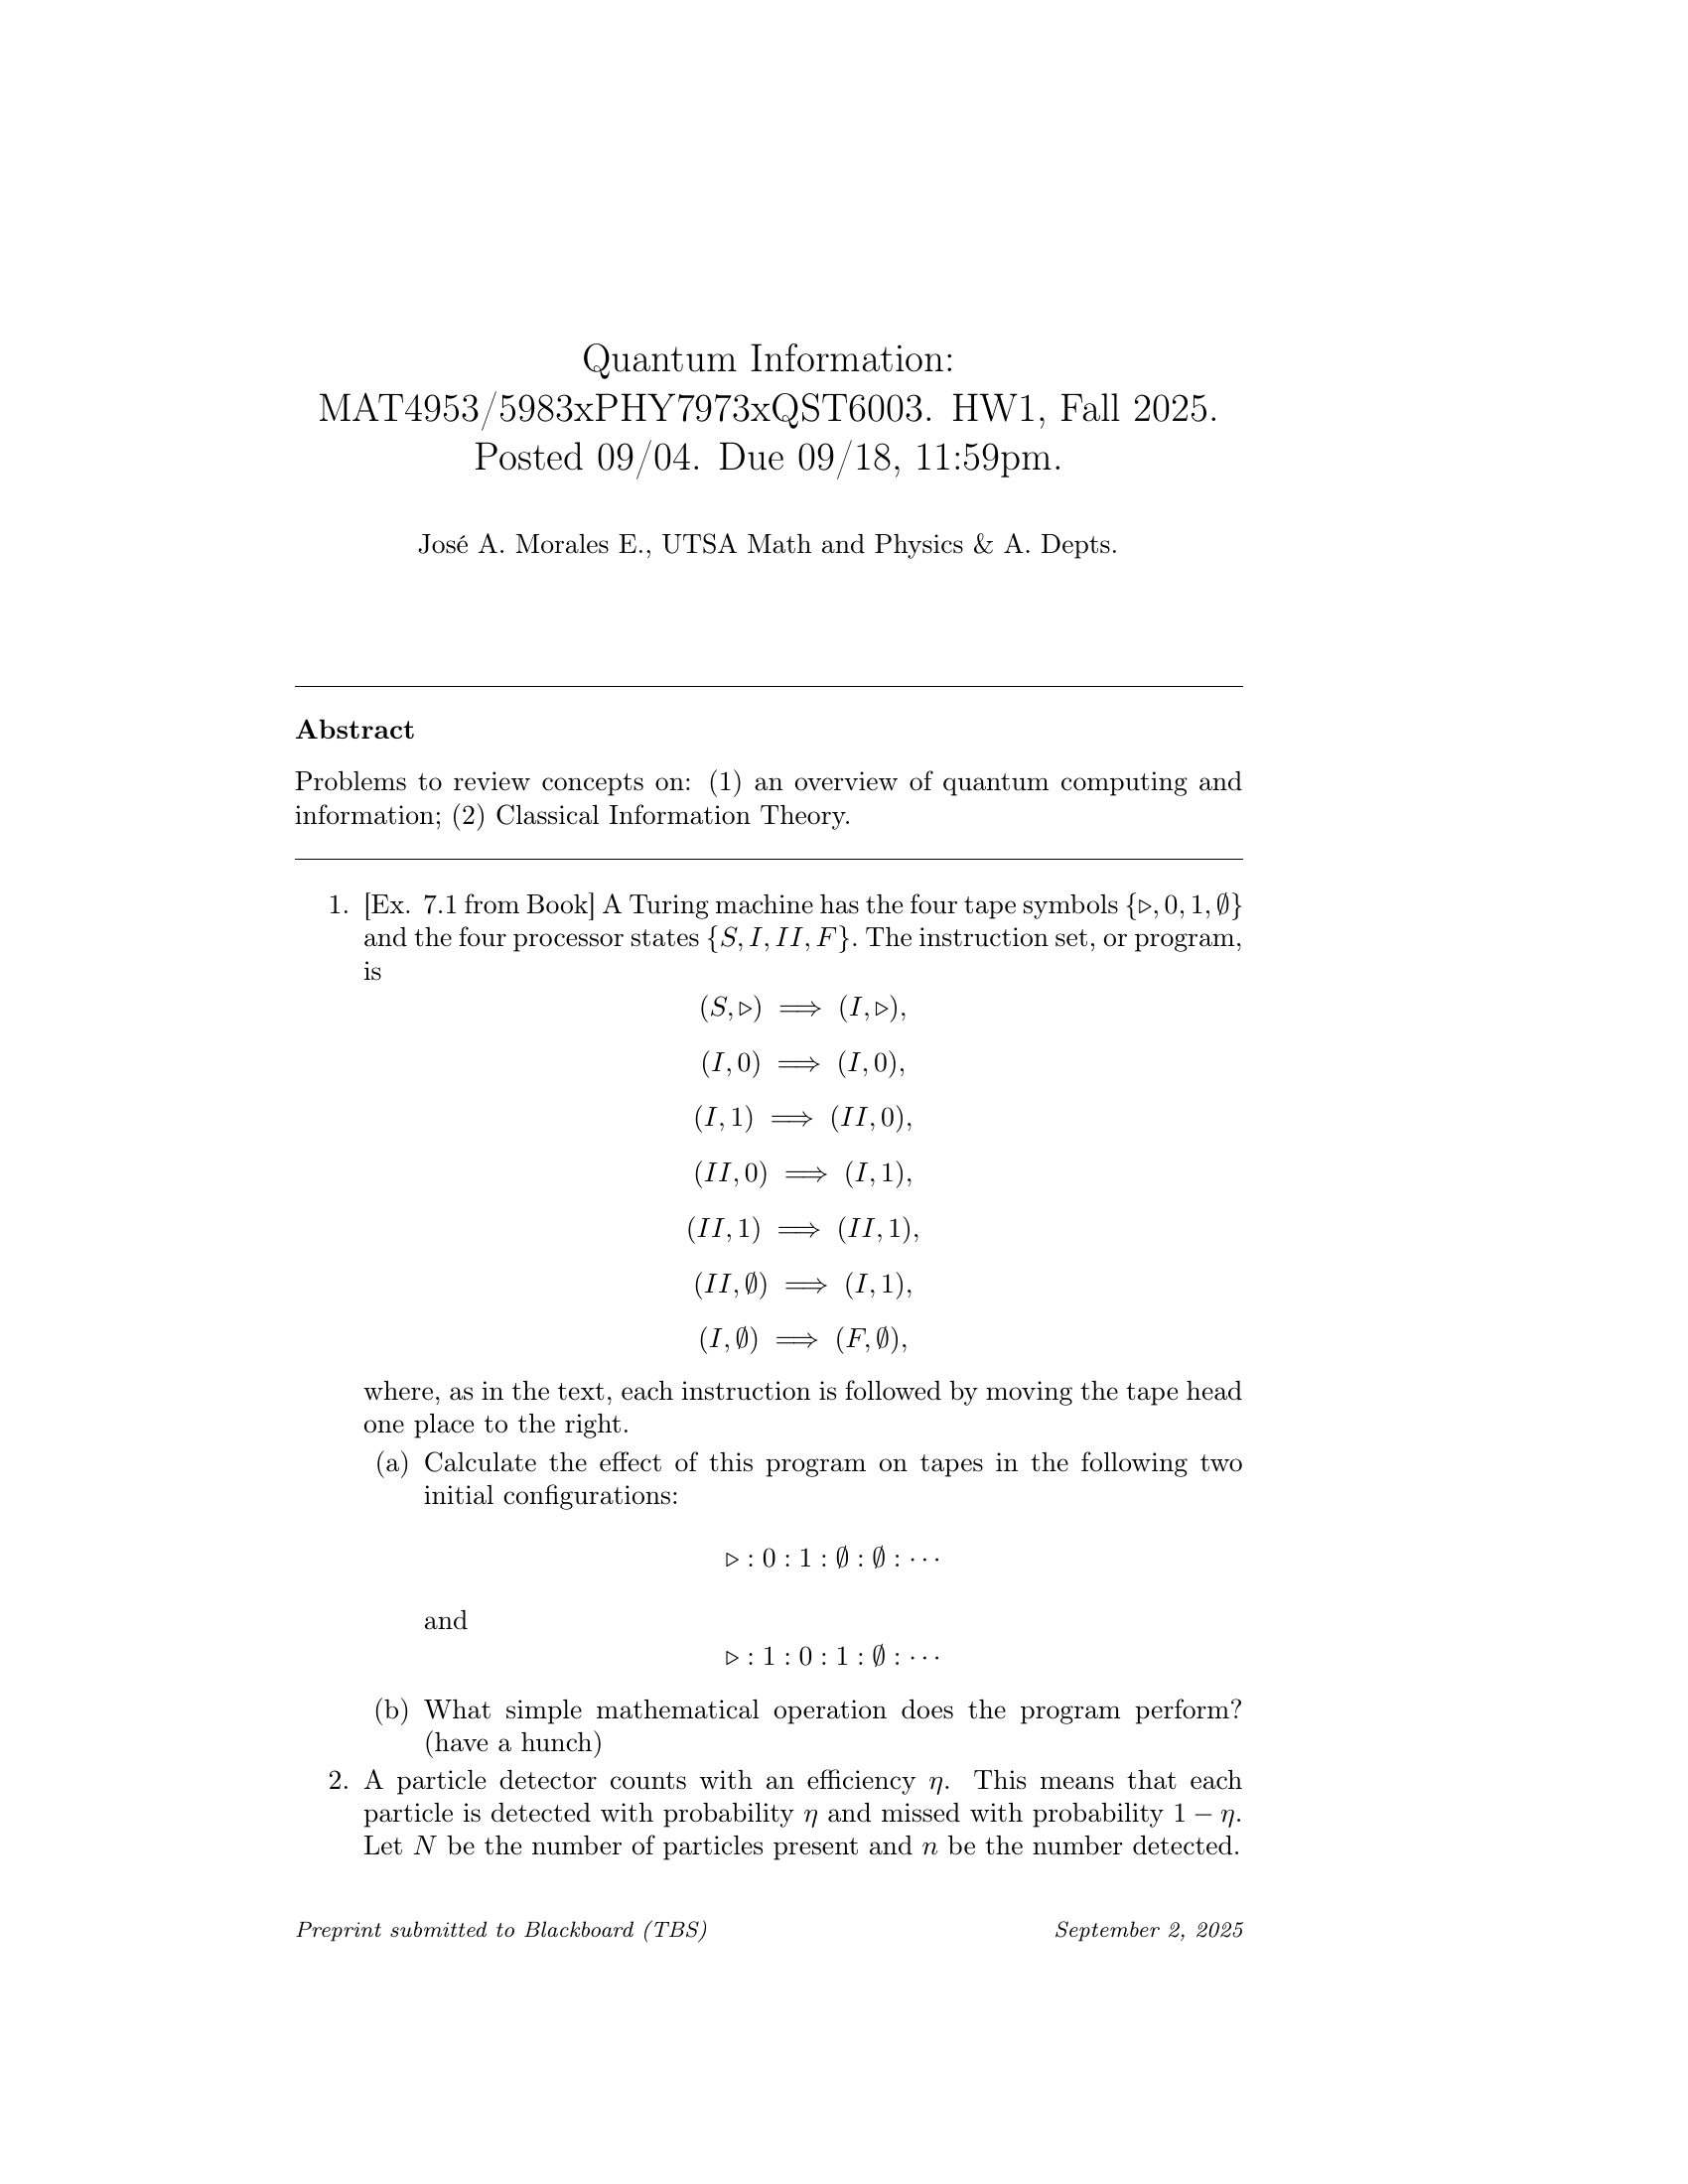

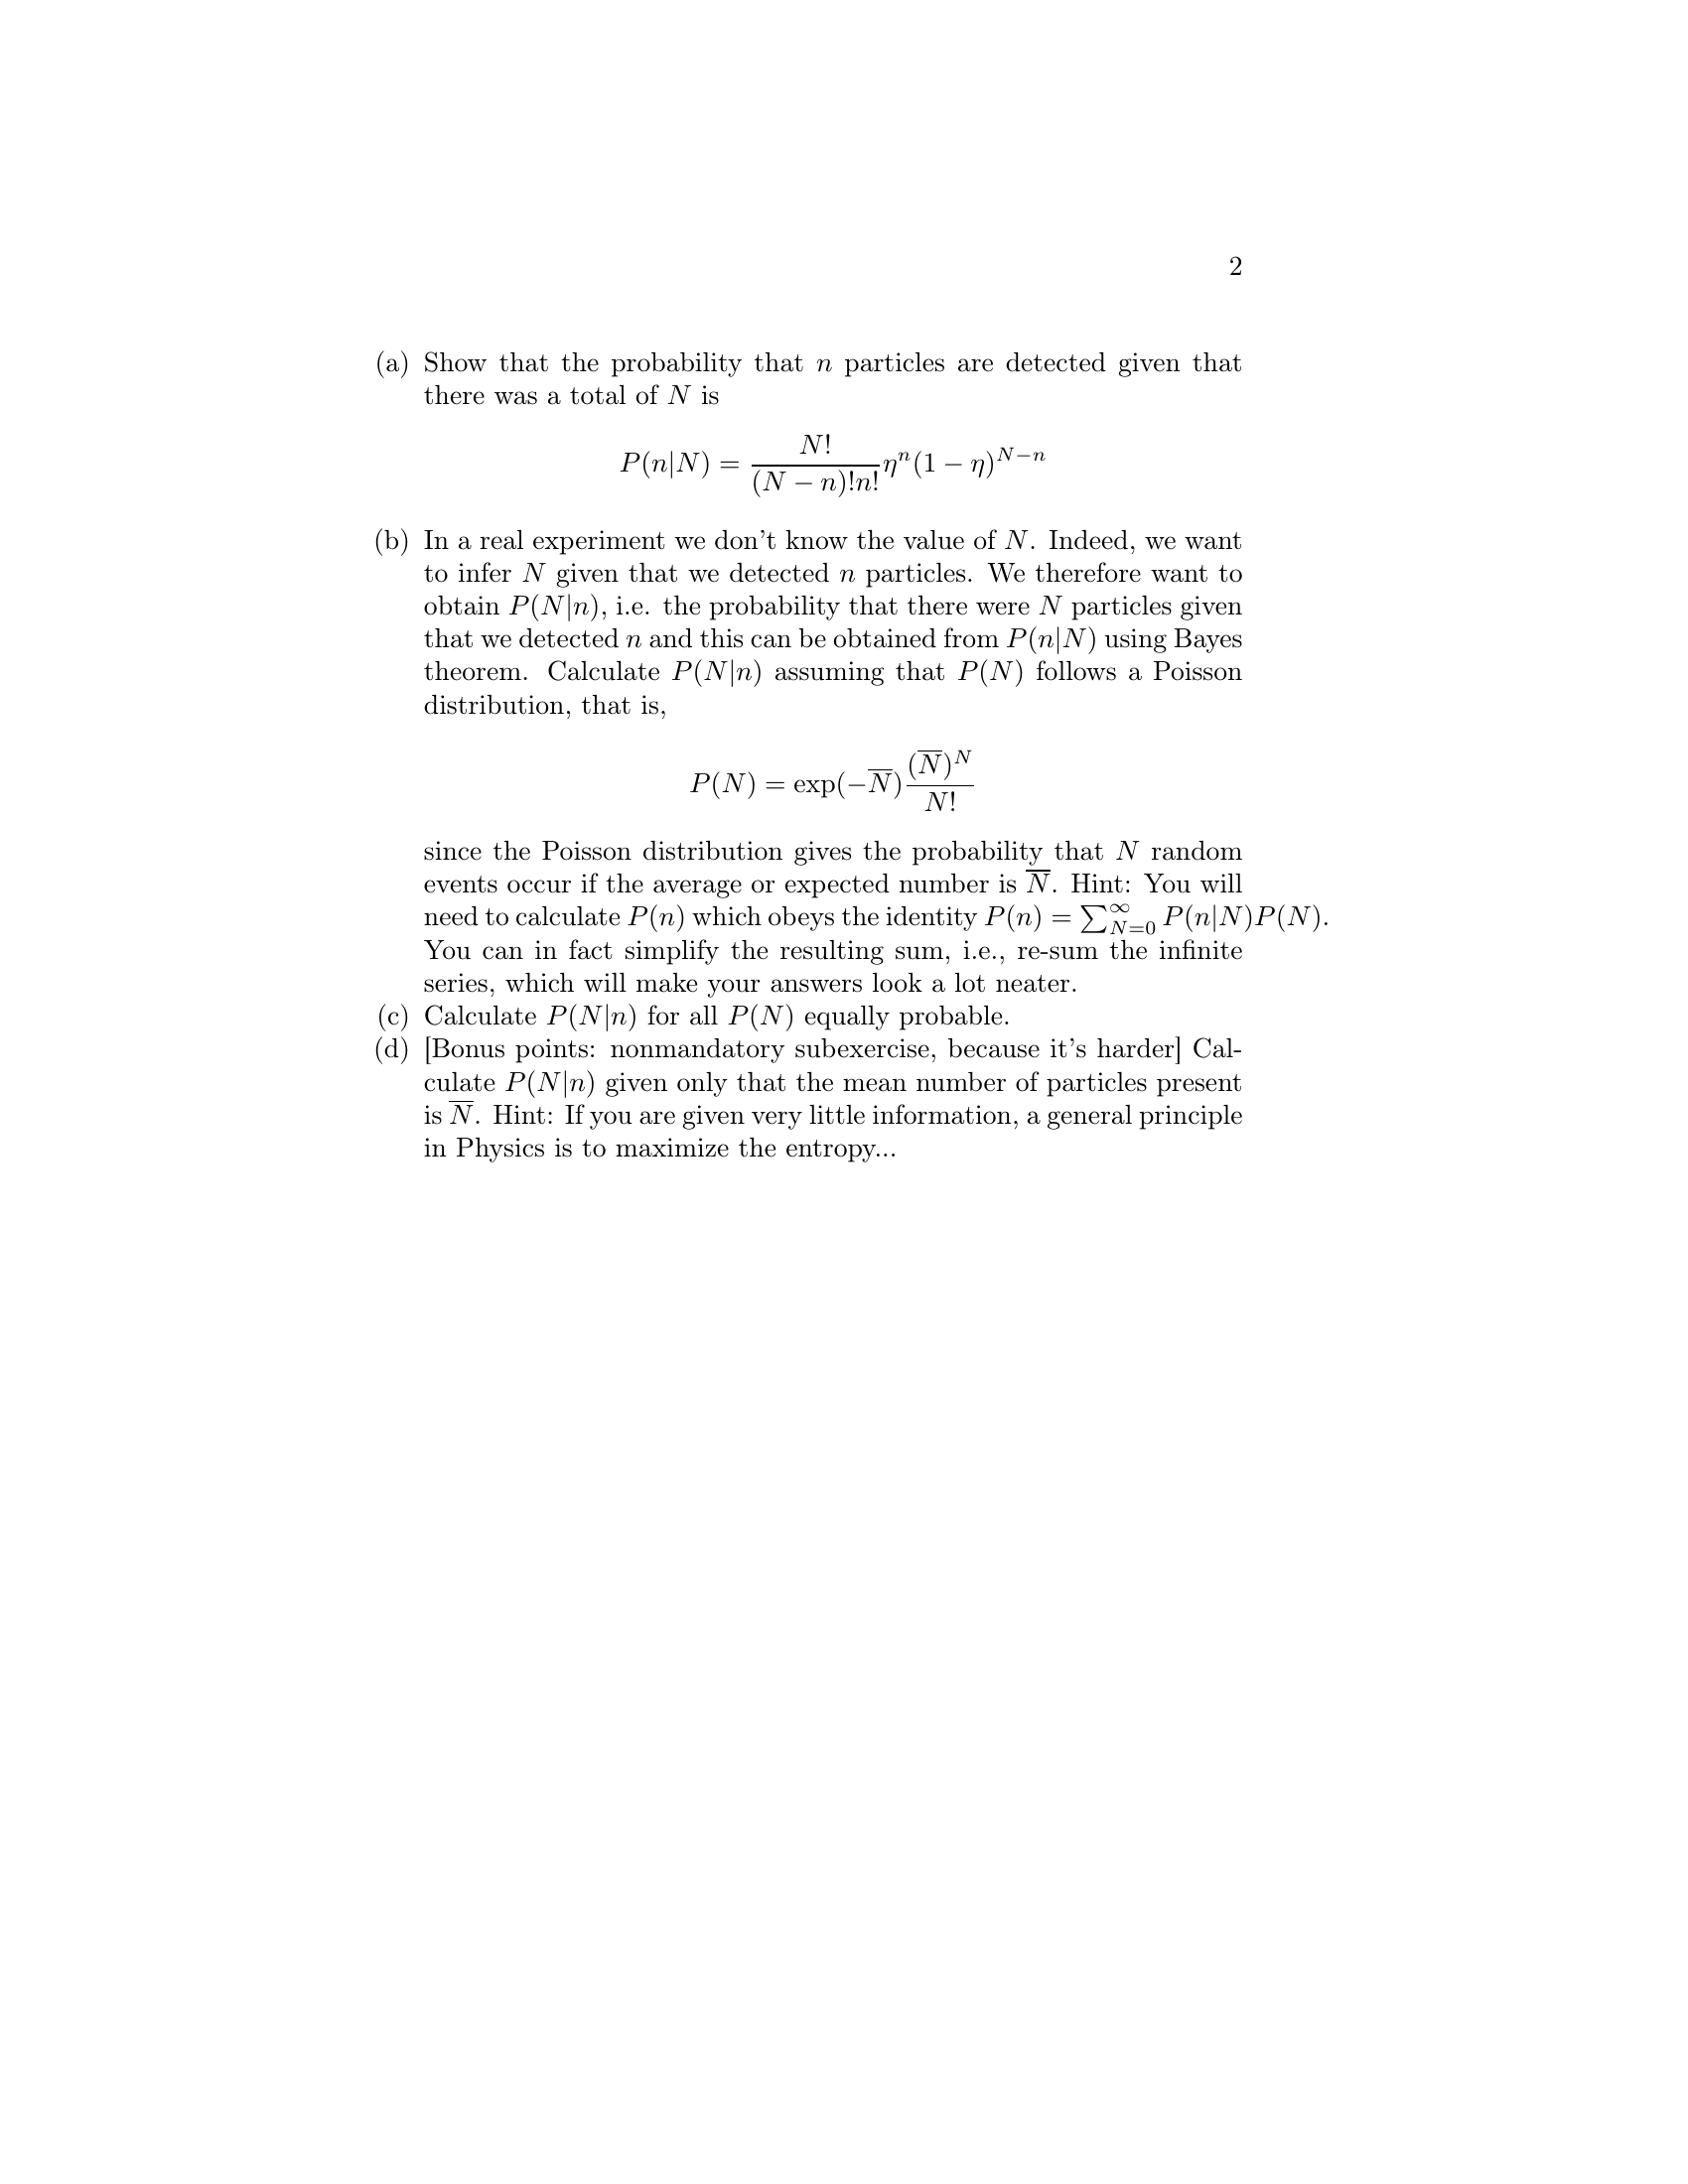

In [1]:
from IPython.display import Image
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.style as style
from pdf2image import convert_from_path
import os

style.use('dark_background')
plt.rcParams['text.usetex'] = False

#convert pdf to images on first run
if not os.path.exists('p_statement'):
    os.makedirs('p_statement')
    pages = convert_from_path('QITHW01.pdf')
    for i, page in enumerate(pages, start=1):
        fname = f'p_statement/p{i}.png'
        page.save(fname, 'PNG')

#display pdf pages
pngs = sorted([f for f in os.listdir('p_statement') if f.endswith('.png')])
for p in pngs:
    display(Image(filename=f'p_statement/{p}'))

In [2]:
##problem 1
#turing machine rules and simulation
rules = {('S','▷'):('I','▷'),('I','0'):('I','0'),('I','1'):('II','0'),('II','0'):('I','1'),('II','1'):('II','1'),('II','∅'):('I','1'),('I','∅'):('F','∅')}

def simulate(tape):
    tape = tape + ['∅']*10
    state='S'
    pos=0
    step=0
    while state!='F' and step<100:
        sym = tape[pos]
        new_state,new_sym = rules[(state,sym)]
        tape[pos] = new_sym
        state = new_state
        pos += 1
        step += 1
    return tape

#initial tapes from problem statement
tape1 = ['▷','0','1']
tape2 = ['▷','1','0','1']
res1 = simulate(tape1.copy())
res2 = simulate(tape2.copy())
print('initial tape1:', tape1)
print('final tape1:', res1[:5])
print('initial tape2:', tape2)
print('final tape2:', res2[:6])

#verify operation on a range of binary strings
def trim_out(t):
    out=[]
    for s in t[1:]:
        if s=='∅':
            break
        out.append(s)
    return ''.join(out)

def val_rev(bits):
    v=0
    for i,b in enumerate(bits):
        v += int(b)*(2**i)
    return v

#show doubling behaviour for numbers interpreted with lsb at left
for bits in ['0','1','10','11','101','111']:
    t = ['▷'] + list(bits)
    out = trim_out(simulate(t.copy()))
    print(bits, '->', out, 'values', val_rev(bits), '->', val_rev(out))

initial tape1: ['▷', '0', '1']
final tape1: ['▷', '0', '0', '1', '∅']
initial tape2: ['▷', '1', '0', '1']
final tape2: ['▷', '0', '1', '0', '1', '∅']
0 -> 0 values 0 -> 0
1 -> 01 values 1 -> 2
10 -> 01 values 1 -> 2
11 -> 011 values 3 -> 6
101 -> 0101 values 5 -> 10
111 -> 0111 values 7 -> 14


In [3]:
##problem 2 part a
#define symbols
n,N,eta = sp.symbols('n N eta', integer=True, positive=True)
#p(n|N) for detector efficiency
P_n_given_N = sp.factorial(N)/(sp.factorial(n)*sp.factorial(N-n)) * eta**n * (1-eta)**(N-n)
display(P_n_given_N.simplify())

eta**n*(1 - eta)**(N - n)*binomial(N, n)

(-lambda*(eta - 1))**(N - n)*exp(lambda*(eta - 1))/factorial(N - n)

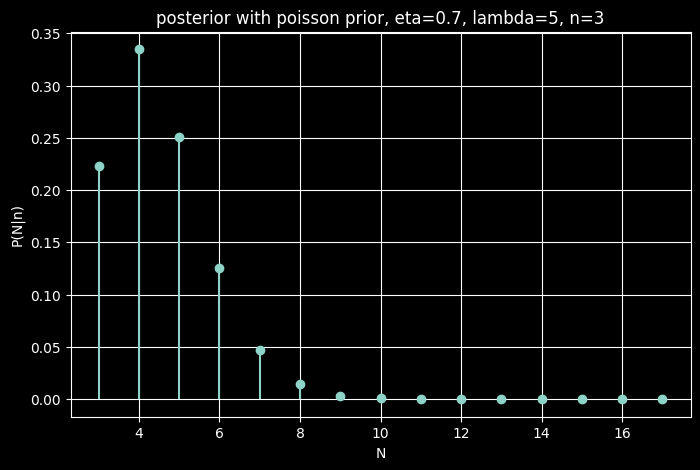

In [4]:
##problem 2 part b
#poisson prior for total particles
lam = sp.symbols('lambda', positive=True)
#posterior p(N|n) proportional to p(n|N)*p(N)
N_sym = sp.symbols('N', integer=True, nonnegative=True)
posterior = sp.exp(-(1-eta)*lam) * ((1-eta)*lam)**(N_sym-n) / sp.factorial(N_sym-n)
display(sp.simplify(posterior))

#numeric example plot
lam_val = 5
eta_val = 0.7
n_val = 3
N_vals = np.arange(n_val, n_val+15)
#numeric posterior using python factorial
import math
p_vals = np.exp(-(1-eta_val)*lam_val) * (((1-eta_val)*lam_val)**(N_vals-n_val) / np.vectorize(math.factorial)(N_vals-n_val))
plt.figure(figsize=(8,5))
plt.stem(N_vals, p_vals, basefmt=' ')
plt.xlabel('N')
plt.ylabel('P(N|n)')
plt.title('posterior with poisson prior, eta='+str(eta_val)+', lambda='+str(lam_val)+', n='+str(n_val))
plt.grid(True)
plt.show()

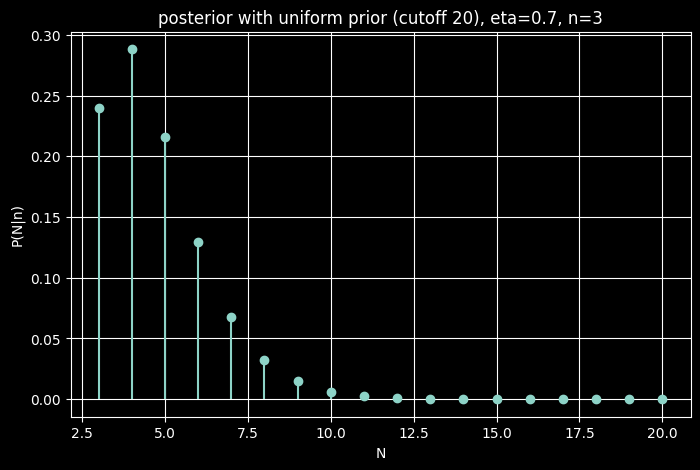

In [5]:
##problem 2 part c
#uniform prior over N (improper)
#evaluate posterior up to a cutoff for display
eta_val = 0.7
n_val = 3
N_max = 20
N_vals = np.arange(n_val, N_max+1)
p_unnorm = []
for N_i in N_vals:
    #binomial coefficient using python math
    import math
    coeff = math.factorial(int(N_i)) / (math.factorial(int(n_val)) * math.factorial(int(N_i-n_val)))
    val = coeff * eta_val**n_val * (1-eta_val)**(N_i-n_val)
    p_unnorm.append(val)
p_unnorm = np.array(p_unnorm)
p_norm = p_unnorm / np.sum(p_unnorm)
plt.figure(figsize=(8,5))
plt.stem(N_vals, p_norm, basefmt=' ')
plt.xlabel('N')
plt.ylabel('P(N|n)')
plt.title('posterior with uniform prior (cutoff '+str(N_max)+'), eta='+str(eta_val)+', n='+str(n_val))
plt.grid(True)
plt.show()

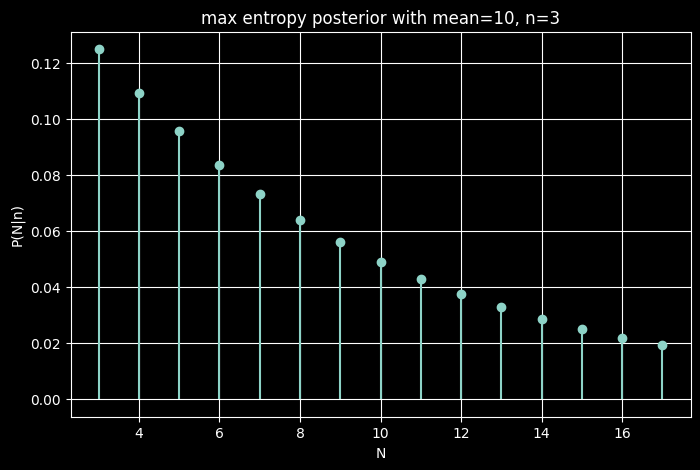

In [6]:
##problem 2 part d
#max entropy posterior given only mean
#for discrete support N>=n the max entropy distribution with given mean is geometric
mean_N = 10
n_val = 3
mbar = mean_N - n_val
r = mbar/(1 + mbar)
N_vals = np.arange(n_val, n_val+15)
p_vals = (1/(1+mbar)) * (mbar/(1+mbar))**(N_vals-n_val)
plt.figure(figsize=(8,5))
plt.stem(N_vals, p_vals, basefmt=' ')
plt.xlabel('N')
plt.ylabel('P(N|n)')
plt.title('max entropy posterior with mean='+str(mean_N)+', n='+str(n_val))
plt.grid(True)
plt.show()